In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.io import savemat

In [ ]:


def create_df(s1,s2,df,stateList):
  s=pd.concat([s1, s2], ignore_index=True)
  us=s.fillna(0)

  #take only US states
  #us=us[us['sub_region_1']!=0]
  #us=us[us['sub_region_2']==0]

  us=us[us['sub_region_1'].isin(stateList)]
  us=us[us['sub_region_2']==0]


  #covid cases in US
  USCases=df.fillna(0)
  USCases=USCases[USCases['state'].isin(stateList)]


  #to match columns on merge
  USCases.columns=["date",	"sub_region_1",	'fips', 'cases', 'deaths']

  dat= pd.merge(us, USCases, on=['sub_region_1', 'date'],how='inner')

  infect=np.array(dat.cases)
  for i in range(len(infect)-1,0,-1):
    infect[i]=infect[i]-infect[i-1]

  infect=infect[1:]
  
  #day 1 removed to equal it to infect list
  dat=dat[1:]  
  dat=dat.reset_index()
  dat=dat.drop('index',axis=1)
  dat.cases=np.array(infect)
						

  return dat



In [ ]:
s1=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/2020_US_Region_Mobility_Report.csv')
s2=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/2021_US_Region_Mobility_Report.csv')
df=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/us-states.csv')
   

In [ ]:
l=list(set(s1.sub_region_1.unique()).intersection(df.state.unique()))
l.sort()
l

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
fin=create_df(s1,s2,df,["Alabama"])
for i in range(1,len(l)):
  temp = create_df(s1,s2,df,[l[i]])
  if len(temp)>0:
    fin=pd.concat([fin, temp], ignore_index=True)
    print(l[i])
  else:
    print('FAIL',l[i])

Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [ ]:
st=[
'Colorado',
'Massachusetts',
'Ohio',
'Oklahoma',
'Pennsylvania',
'Washington',
]
import matplotlib.pyplot as plt
for i in st:
  nam=i
  plt.plot(list(fin[fin['sub_region_1']==nam].cases))

NameError: ignored

In [ ]:
fin

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,cases,deaths
0,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-14,1.0,28.0,55.0,12.0,4.0,0.0,1,6,0
1,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-15,-7.0,16.0,16.0,6.0,-4.0,2.0,1,11,0
2,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-16,-2.0,24.0,22.0,2.0,-10.0,4.0,1,6,0
3,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-17,-11.0,17.0,25.0,-1.0,-17.0,7.0,1,10,0
4,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-03-18,-13.0,13.0,39.0,-3.0,-22.0,8.0,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27288,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-17,21.0,11.0,225.0,50.0,-26.0,2.0,56,412,809
27289,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-18,17.0,8.0,194.0,42.0,-27.0,3.0,56,488,809
27290,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-19,16.0,9.0,170.0,53.0,-27.0,3.0,56,306,809
27291,US,United States,Wyoming,0,0.0,US-WY,0.0,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-20,8.0,4.0,187.0,61.0,-23.0,3.0,56,521,809


In [ ]:
fin.to_csv('processed_US_data_2.csv',index=False)

create training data for  matlab


In [ ]:
dat=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/USData/processed_US_data_2.csv')

In [ ]:
st=dat.sub_region_1.unique()
comp=[]
for i in st:
  m=(dat[dat['sub_region_1']==i].cases).mean()
  if m>1000 and m<1500:
    su=(dat[dat['sub_region_1']==i].cases).sum()
    print(i,su,m)
    comp.append(i)

comp.remove('Missouri')
comp.remove('Massachusetts')

Alabama 659744 1254.2661596958176
Colorado 602236 1127.7827715355804
Kentucky 536119 1005.8517823639775
Louisiana 649914 1226.2528301886794
Massachusetts 743734 1344.9077757685352
Minnesota 633648 1188.8330206378987
Missouri 752687 1414.8251879699249
South Carolina 681657 1278.906191369606
Virginia 734078 1379.845864661654
Wisconsin 714791 1292.5696202531647


In [ ]:

nam=comp.copy()
#  2021 april may june july
#dat=dat[dat['sub_region_1']==nam]
dat=dat[dat['sub_region_1'].isin(nam)]


#5/1/2020 - 3/31/2021
dat=dat[dat['date']>='2020-05-01']
dat=dat[dat['date']<'2021-06-01']

dat=dat[dat['cases']>50]
dat=dat[dat['cases']<10000]

dat=dat.reset_index()
dat=dat.drop('index',axis=1)

imr=np.array(dat.cases,'float')



In [ ]:
dat['ct']=1
dat

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,cases,deaths,ct
0,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-05-01,-16.0,6.0,39.0,-17.0,-36.0,13.0,1,226,289,1
1,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-05-02,-21.0,8.0,61.0,-11.0,-20.0,6.0,1,317,288,1
2,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-05-03,-20.0,4.0,52.0,-18.0,-27.0,6.0,1,277,290,1
3,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-05-04,-11.0,6.0,25.0,-15.0,-33.0,11.0,1,224,298,1
4,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-05-05,-12.0,9.0,16.0,-14.0,-33.0,12.0,1,325,315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,US,United States,Wisconsin,0,0.0,US-WI,0.0,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2021-05-25,-2.0,10.0,151.0,-7.0,-21.0,5.0,55,435,7760,1
3062,US,United States,Wisconsin,0,0.0,US-WI,0.0,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2021-05-26,5.0,14.0,190.0,-4.0,-23.0,4.0,55,365,7765,1
3063,US,United States,Wisconsin,0,0.0,US-WI,0.0,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2021-05-27,-3.0,9.0,45.0,-12.0,-22.0,6.0,55,350,7814,1
3064,US,United States,Wisconsin,0,0.0,US-WI,0.0,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2021-05-28,-1.0,13.0,120.0,-4.0,-25.0,6.0,55,265,7830,1


In [ ]:

dat.groupby('sub_region_1').sum().ct

sub_region_1
Alabama           390
Colorado          396
Kentucky          385
Louisiana         328
Minnesota         390
South Carolina    392
Virginia          395
Wisconsin         390
Name: ct, dtype: int64

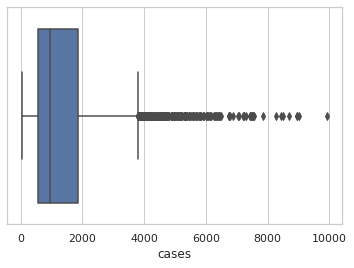

In [ ]:
import seaborn
import pandas as pd

 
# use to set style of background of plot
seaborn.set(style="whitegrid")
 
# loading data-set

seaborn.boxplot(x = dat['cases'])


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
dat

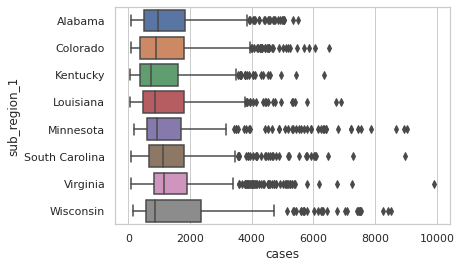

In [ ]:

ax = sns.boxplot(x="cases", y="sub_region_1", data=dat)


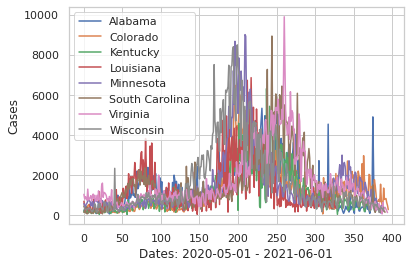

In [ ]:
import matplotlib.pyplot as plt
for nam in range(len(comp)):
  df=dat[dat["sub_region_1"]==comp[nam]]
  plt.plot(list(df.cases), label=comp[nam])
plt.xlabel('Dates: 2020-05-01 - 2021-06-01')
# naming the y axis
plt.ylabel('Cases')
plt.legend()
plt.show()


In [ ]:
plt.plot(dat.sub,dat.case)

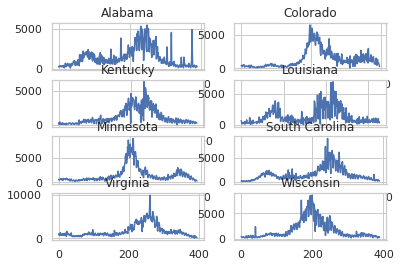

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(comp)):
  df=dat[dat["sub_region_1"]==comp[i]]
  plt.subplot(4,2,i+1)
  plt.title(comp[i])
  plt.plot(list(df.cases))

plt.savefig('foo.png')



In [ ]:
con=dat.values

s=pd.DataFrame(np.array(con[:,9:15]))
s.to_csv('x.csv',index=False)

s=pd.DataFrame(imr)
s.to_csv('y.csv',index=False)


df = pd.read_csv('x.csv')
df=df.astype("float")
x=df.fillna(0)
x=x.values
X=x.copy()

df=pd.read_csv('y.csv')
y=df.fillna(0)
y=y.values
Y=y.copy()




x=np.array_split(X,29)
y=np.array_split(Y,29)


x=np.array(x)

l=[]
l.append(x)
x=np.array(l)


y=np.array(y)
l=[]
l.append(y)
y=np.array(l)



data={'X': x, 'Y':y}

savemat('us-fewstates.mat', data, oned_as='row')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


predicting


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def predictInf(weights,nam):
  dat=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/processed_US_data_2.csv')
  #  2021 april may june july
  dat=dat[dat['sub_region_1']==nam]

  dat=dat[dat['date']>='2021-06-01']
  dat=dat[dat['date']<='2021-07-01']

  #dat=dat[dat['cases']>0]

  dat=dat.reset_index()
  dat=dat.drop('index',axis=1)

  con=dat.values
  arr=con[:,9:15]

  infectionNo=np.dot(arr,np.transpose(weights))


  for i in range(len(infectionNo)):
    if infectionNo[i]<0:
      infectionNo[i]=0

  conf=list(dat.cases)

  return [infectionNo,conf]

In [ ]:

#all US
#weights=np.array([ -38.7021,   28.7841,   -4.4472,  -16.5447,  -21.3816,   26.1357])
#all US 20 iters 2 outer iter
#weights=np.array([ -38.6617,   30.6531,   -4.3643, -16.7402,  -20.6145,   29.9401])
#colorado
#weights=np.array([-14.8703,   34.4954,  -15.8544,  -53.3240,  -22.5570,  -78.0761])
#masschuttes
#weights=np.array([-53.9456,   76.2085,  -14.5278,  -76.1049,   40.3227,  -41.0841])
#oklahoma(nope)
#weights=np.array([-120.8234,   52.9697,  -18.7666,   73.0296,  -53.8096,  -61.2328])
#wahington
#weights=np.array([ 22.3830,   28.9327,   -5.7542,  -58.7745,  -28.1715, -127.7467])


#us-fewstates
#weights=np.array([-60.2787,   29.7225,  -2.4390,    0.7915,   -3.0091,   67.4911])

#us-fewstates date adjusted
weights=np.array([ -58.5539,   31.8991,   -2.4852,    0.2373,    2.4239,   90.2976])


In [ ]:
comp

['Alabama',
 'Colorado',
 'Kentucky',
 'Louisiana',
 'Minnesota',
 'South Carolina',
 'Virginia',
 'Wisconsin']

In [ ]:
[infectionNo,conf]=predictInf(weights,'Alabama')
d=pd.DataFrame(infectionNo,columns=['Alabama'])

for i in range(1,len(comp)):
  [infectionNo,conf]=predictInf(weights,comp[i])
  d[comp[i]]=infectionNo


In [ ]:
d.to_csv('infection_prediction.csv',index=False)

In [ ]:
d

,Alabama,Colorado,Kentucky,Louisiana,Minnesota,South Carolina,Virginia,Wisconsin
0,517.084,906.984,513.495,599.971,277.198,104.871,916.357,253.222
1,496.768,596.937,906.758,389.955,29.297,230.474,943.198,0
2,693.211,548.189,697.037,563.041,277.071,192.277,1270.78,11.0148
3,605.403,768.307,362.357,999.538,473.052,128.696,1052.89,157.256
4,342.485,571.747,0,1080.12,302.608,44.0097,412.581,0
5,727.299,84.6081,46.2131,994.316,0,0,202.722,0
6,705.947,460.389,564.707,719.416,64.6623,262.513,993.993,164.888
7,751.588,612.567,698.267,518.241,110.605,149.353,932.886,125.191
8,505.662,597.448,716.236,308.916,11.4593,13.4269,1099.44,0
9,814.623,582.635,588.861,543.122,321.894,12.0183,1107.49,0


573.6717193548386
461.6916794035286


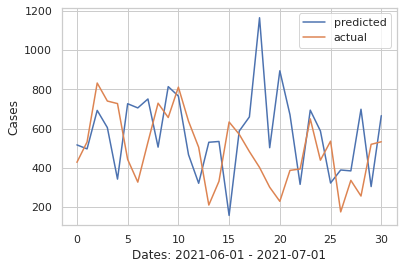

In [ ]:
nam= 'Alabama'
[infectionNo,conf]=predictInf(weights,nam)

print(np.mean(infectionNo))


import math

var=((infectionNo-conf)*(infectionNo-conf)).sum()


print(math.sqrt(var/len(conf)))

plt.plot(infectionNo,label='predicted')
plt.plot(list(dat.cases),label='actual')

plt.xlabel('Dates: 2021-06-01 - 2021-07-01')
# naming the y axis
plt.ylabel('Cases')
plt.legend()
plt.show()

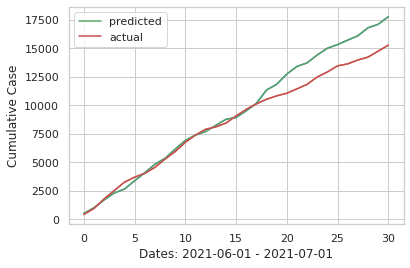

In [ ]:

#cumulative predict
case =list(dat.cases)
for i in range(1,len(infectionNo)):
  infectionNo[i]=infectionNo[i]+infectionNo[i-1]
  case[i]=case[i]+case[i-1]

plt.plot(infectionNo)
plt.plot(case)


plt.plot(infectionNo,label='predicted')
plt.plot(case,label='actual')

plt.xlabel('Dates: 2021-06-01 - 2021-07-01')
# naming the y axis
plt.ylabel('Cumulative Case')
plt.legend()
plt.show()

seir simulation

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/us-states.csv')


In [ ]:

df=df[df['date']>='2021-06-01']
df=df[df['date']<='2021-07-01']

In [ ]:
df[df['state']=='South Carolina']

,date,state,fips,cases,deaths
25082,2021-06-01,South Carolina,45,593262,9736
25137,2021-06-02,South Carolina,45,593526,9739
25192,2021-06-03,South Carolina,45,593628,9739
25247,2021-06-04,South Carolina,45,593727,9744
25302,2021-06-05,South Carolina,45,593948,9752
25357,2021-06-06,South Carolina,45,594130,9754
25412,2021-06-07,South Carolina,45,594225,9754
25467,2021-06-08,South Carolina,45,594345,9754
25522,2021-06-09,South Carolina,45,594574,9761
25577,2021-06-10,South Carolina,45,594659,9761


In [ ]:
import pandas as pd
s=pd.read_csv("/content/gdrive/MyDrive/kumersanresearch/USData/nst-est2020.csv")

In [ ]:
d=dict(s.values)

In [ ]:
d

{'Alabama': 4907965,
 'Alaska': 733603,
 'Arizona': 7291843,
 'Arkansas': 3020985,
 'California': 39437610,
 'Colorado': 5758486,
 'Connecticut': 3566022,
 'Delaware': 976668,
 'District of Columbia': 708253,
 'Florida': 21492056,
 'Georgia': 10628020,
 'Hawaii': 1415615,
 'Idaho': 1789060,
 'Illinois': 12667017,
 'Indiana': 6731010,
 'Iowa': 3159596,
 'Kansas': 2912635,
 'Kentucky': 4472345,
 'Louisiana': 4658285,
 'Maine': 1345770,
 'Maryland': 6054954,
 'Massachusetts': 6894883,
 'Michigan': 9984795,
 'Midwest Region': 68340091,
 'Minnesota': 5640053,
 'Mississippi': 2978227,
 'Missouri': 6140475,
 'Montana': 1070123,
 'Nebraska': 1932571,
 'Nevada': 3090771,
 'New Hampshire': 1360783,
 'New Jersey': 8891258,
 'New Mexico': 2099634,
 'New York': 19463131,
 'North Carolina': 10501384,
 'North Dakota': 763724,
 'Northeast Region': 56002934,
 'Ohio': 11696507,
 'Oklahoma': 3960676,
 'Oregon': 4216116,
 'Pennsylvania': 12798883,
 'Puerto Rico': 3193553,
 'Rhode Island': 1058158,
 'South

461071

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [ ]:
def covid(x,t):
  s,e,i,r = x
  dx = np.zeros(4)
  dx[0] = -(1-u)*beta * s * i
  dx[1] = (1-u)*beta * s * i - alpha * e
  dx[2] = alpha * e - gamma * i
  dx[3] = gamma*i
  return dx

def simulateSEIR(u,x0,t1,t2):

  t = np.linspace(0, t1, t2)
  x = odeint(covid,x0,t)
  s = x[:,0]; e = x[:,1]; i = x[:,2]; r = x[:,3]

  # plot the data
  plt.figure(figsize=(8,5))

  plt.subplot(2,1,1)
  plt.title('Social Distancing = '+str(u*100)+'%')
  plt.plot(t,s, color='blue', lw=3, label='Susceptible')
  plt.plot(t,r, color='red',  lw=3, label='Recovered')
  plt.ylabel('Fraction')
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t,i, color='orange', lw=3, label='Infective')
  plt.plot(t,e, color='purple', lw=3, label='Exposed')
  plt.ylim(0, .5)
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction')
  plt.legend()

  plt.show()

  return pd.DataFrame(list(zip(s,e,i,r)),columns =['s','e','i','r'])



common for all


In [ ]:
u = 0.1  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes
t_incubation = 7
t_infective = 3.3
R0=2
  # initial number of infected and recovered individuals
        
t1=1000
t2=1001


alpha = 1/t_incubation
 

LOUSINANA

0.14285714285714285
0.014082435917939758
0.0037849181345292254


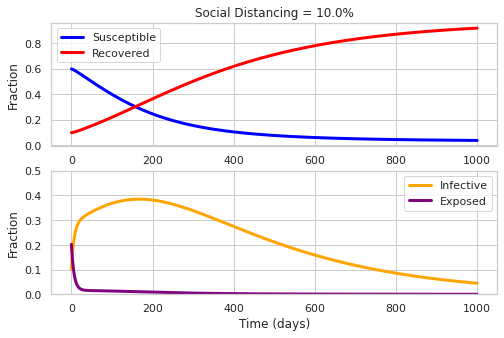

In [ ]:

N = 4658285 


e0=(471663*R0)/N
i0=471663	/N
r0=461071/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=656/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

u=.1
louisana_df=simulateSEIR(u,x0,t1,t2)



In [ ]:
louisana_df

,s,e,i,r
0,0.647890,0.151879,0.101252,0.098979
1,0.646914,0.132571,0.121145,0.099369
2,0.645778,0.115984,0.138413,0.099825
3,0.644503,0.101733,0.153427,0.100337
4,0.643109,0.089490,0.166502,0.100898
...,...,...,...,...
996,0.027839,0.000156,0.057393,0.914612
997,0.027818,0.000155,0.057214,0.914813
998,0.027796,0.000154,0.057036,0.915013
999,0.027775,0.000154,0.056859,0.915213


In [ ]:
544045-	11156

532889

Alabama

0.14285714285714285
0.011674899882130375
0.0032273515917187316


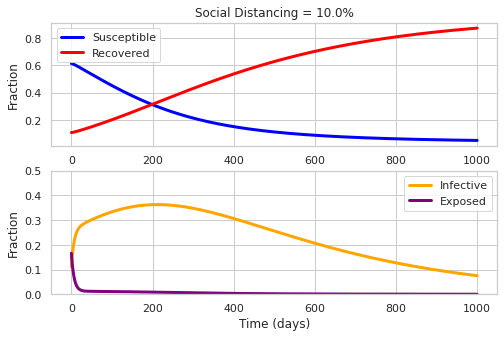

In [ ]:
u=.1
N = 4907965 


e0=(544045*1.5)/N
i0=544045	/N
r0=532889/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=573/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

alabama_df=simulateSEIR(u,x0,t1,t2)

Colorado

0.14285714285714285
0.00810977051954281
0.002442870349158038


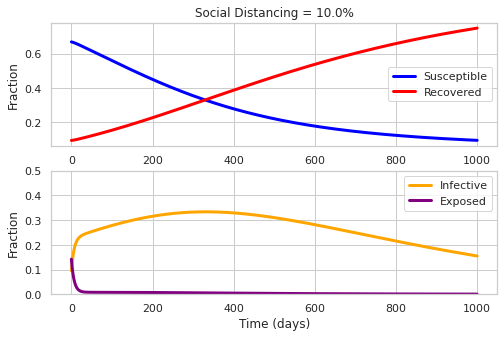

In [ ]:
u=.1
N = 5758486 

e0=(546596*1.5)/N
i0=544045	/N
r0=539873/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=467/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

colorado_df=simulateSEIR(u,x0,t1,t2)

Kentucky

0.14285714285714285
0.008496661147563526
0.00245179535677162


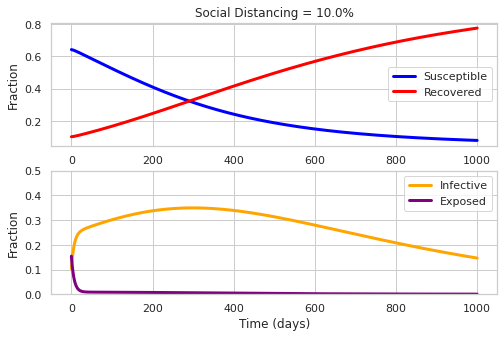

In [ ]:
u=.1
N = 4472345 

e0=(460454*1.5)/N
i0=460454	/N
r0=453345/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=380/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

kentucky_df=simulateSEIR(u,x0,t1,t2)

In [ ]:
460454-7109

453345

Minnesota


0.14285714285714285
0.0020389879314963886
0.0005762155029835365


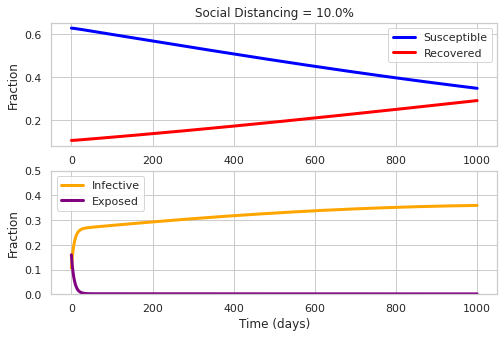

In [ ]:
u=.1
N = 5640053 

e0=(601610*1.5)/N
i0=601610	/N
r0=594090/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=115/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

minnesota_df=simulateSEIR(u,x0,t1,t2)



**Wisconsin**

0.14285714285714285
0.0012704776532423533
0.00034070090325599126


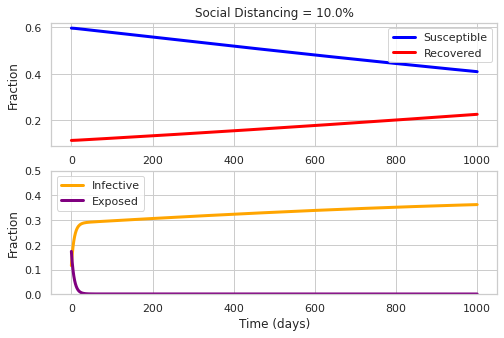

In [ ]:
u=.1
N = 5824581 

e0=(674693*1.5)/N
i0=674693	/N
r0=666818/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=74/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

wisconsin_df=simulateSEIR(u,x0,t1,t2)





Virginia

0.14285714285714285
0.00878849436496233
0.002867098870021094


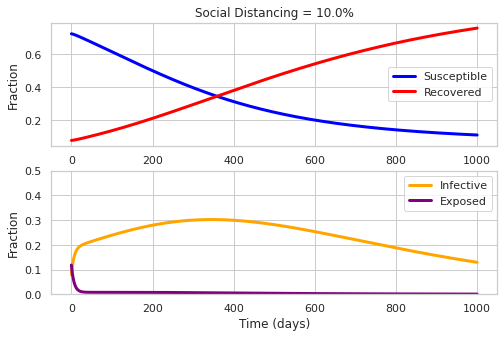

In [ ]:
u=.1
N = 8556642 

e0=(675597*1.5)/N
i0=675597	/N
r0=664403/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=752/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

virginia_df=simulateSEIR(u,x0,t1,t2)



0.14285714285714285
0.0012602511738754973
0.0003398719584178605


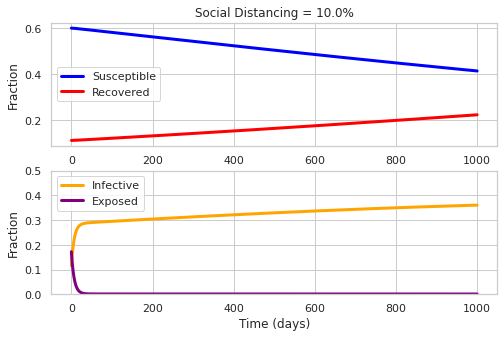

In [ ]:
u=.1
N = 5157702 

e0=(593262*1.5)/N
i0=593262	/N
r0=583526/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=65/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

southcar_df=simulateSEIR(u,x0,t1,t2)





Text(0, 0.5, 'Susceptible Fraction(in %)')

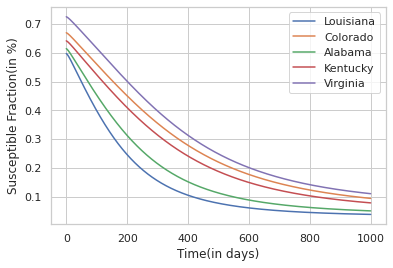

In [ ]:
plt.plot(louisana_df.s,label='Louisiana')
plt.plot(colorado_df.s,label='Colorado')
plt.plot(alabama_df.s,label='Alabama')
plt.plot(kentucky_df.s,label='Kentucky')
#plt.plot(minnesota_df.s,label='Minnesota')
#plt.plot(wisconsin_df.s,label='Wisconsin')
plt.plot(virginia_df.s,label='Virginia')
#plt.plot(southcar_df.s,label='South Carolina')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Susceptible Fraction(in %)')



Text(0, 0.5, 'Exposed Fraction(in %)')

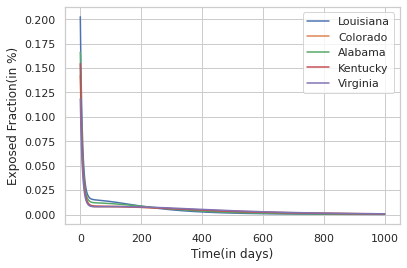

In [ ]:
plt.plot(louisana_df.e,label='Louisiana')
plt.plot(colorado_df.e,label='Colorado')
plt.plot(alabama_df.e,label='Alabama')
plt.plot(kentucky_df.e,label='Kentucky')
#plt.plot(minnesota_df.e,label='Minnesota')
#plt.plot(wisconsin_df.e,label='Wisconsin')
plt.plot(virginia_df.e,label='Virginia')
#plt.plot(southcar_df.e,label='South Carolina')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Exposed Fraction(in %)')



Text(0, 0.5, 'Infrection Fraction(in %)')

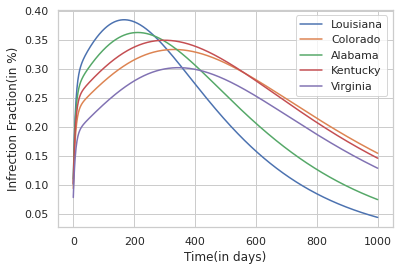

In [ ]:
plt.plot(louisana_df.i,label='Louisiana')
plt.plot(colorado_df.i,label='Colorado')
plt.plot(alabama_df.i,label='Alabama')
plt.plot(kentucky_df.i,label='Kentucky')
#plt.plot(minnesota_df.i,label='Minnesota')
#plt.plot(wisconsin_df.i,label='Wisconsin')
plt.plot(virginia_df.i,label='Virginia')
#plt.plot(southcar_df.i,label='South Carolina')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Infrection Fraction(in %)')



Text(0, 0.5, 'Recovery Fraction(in %)')

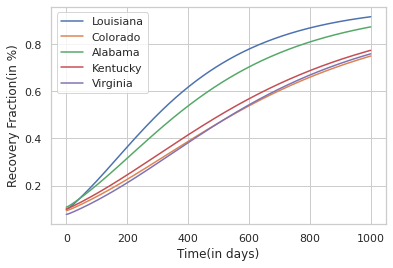

In [ ]:
plt.plot(louisana_df.r,label='Louisiana')
plt.plot(colorado_df.r,label='Colorado')
plt.plot(alabama_df.r,label='Alabama')
plt.plot(kentucky_df.r,label='Kentucky')
#plt.plot(minnesota_df.r,label='Minnesota')
#plt.plot(wisconsin_df.r,label='Wisconsin')
plt.plot(virginia_df.r,label='Virginia')
#plt.plot(southcar_df.r,label='South Carolina')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Recovery Fraction(in %)')



In [ ]:
u=.1
N = 4472345 

e0=(460454*1.5)/N
i0=460454	/N
r0=453345/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=380/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

kentucky_df=simulateSEIR(u,x0,t1,t2)

0.14285714285714285
0.16100345942766492
0.006440138377106596


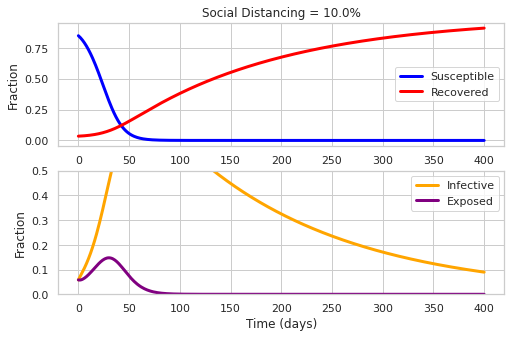

In [ ]:
u = 0.1  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes
t_incubation =7 
t_infective = 3.3
R0=2.5
  # initial number of infected and recovered individuals
        
t1=400
t2=401


alpha = 1/t_incubation
 
N = 4658285 


e0=(271663)/N
i0=271663	/N
r0=161071/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=750/N

gamma = (beta)/R0

beta=beta*1000
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

u=.1
louisana_df=simulateSEIR(u,x0,t1,t2)



In [ ]:
pip install gekko

     |████████████████████████████████| 12.4 MB 60 kB/s 


In [ ]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

t_incubation = 7
t_infective = 3.3
R0 = 2
N = 4658285

# fraction of infected and recovered individuals
e_initial = 471663/N
i_initial = 471663/N
r_initial = 261071/N
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
beta=750/N
gamma = (beta)/R0

beta=beta*500
gamma=gamma*100


In [ ]:
print(alpha)
print(beta)
print(gamma)

0.14285714285714285
0.08050172971383246
0.008050172971383246


apm 35.194.25.190_gk_model37 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            5
   Residuals    :            5
 
 Variable time shift OFF
 Number of state variables:           9020
 Number of total equations: -         8610
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            410
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


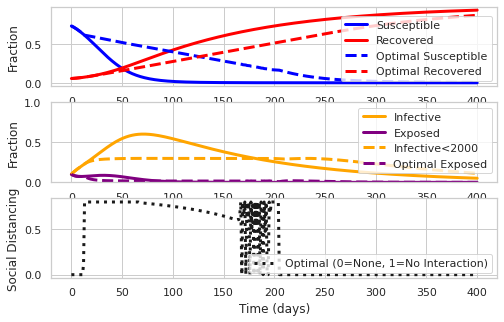

In [ ]:

m = GEKKO()
u = m.MV(0,lb=0.0,ub=0.8)

s,e,i,r = m.Array(m.Var,4)
s.value = s_initial
e.value = e_initial
i.value = i_initial
r.value = r_initial
m.Equations([s.dt()==-(1-u)*beta * s * i,\
             e.dt()== (1-u)*beta * s * i - alpha * e,\
             i.dt()==alpha * e - gamma * i,\
             r.dt()==gamma*i])

t = np.linspace(0, 400, 401)
t = np.insert(t,1,[0.001,0.002,0.004,0.008,0.02,0.04,0.08,\
                   0.2,0.4,0.8])
m.time = t

# initialize with simulation
m.options.IMODE=7
m.options.NODES=3
m.solve(disp=False)

# plot the prediction
plt.figure(figsize=(8,5))
plt.subplot(3,1,1)
plt.plot(m.time, s.value, color='blue', lw=3, label='Susceptible')
plt.plot(m.time, r.value, color='red',  lw=3, label='Recovered')

plt.subplot(3,1,2)
plt.plot(m.time, i.value, color='orange', lw=3, label='Infective')
plt.plot(m.time, e.value, color='purple', lw=3, label='Exposed')

# optimize
m.options.IMODE=6
i.UPPER = 0.3
u.STATUS = 1
m.options.SOLVER = 3
m.options.TIME_SHIFT = 0
s.value = s.value.value
e.value = e.value.value
i.value = i.value.value
r.value = r.value.value
m.Minimize(u)
m.solve(disp=True)

# plot the optimized response
plt.subplot(3,1,1)
plt.plot(m.time, s.value, color='blue', lw=3, ls='--', label='Optimal Susceptible')
plt.plot(m.time, r.value, color='red',  lw=3, ls='--', label='Optimal Recovered')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,2)
plt.plot(m.time, i.value, color='orange', ls='--', lw=3, label='Infective<2000')
plt.plot(m.time, e.value, color='purple', ls='--', lw=3, label='Optimal Exposed')
plt.ylim(0, 1)
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,3)
plt.plot(m.time, u.value, 'k:', lw=3, label='Optimal (0=None, 1=No Interaction)')
plt.ylabel('Social Distancing')
plt.legend()

plt.xlabel('Time (days)')

plt.show()

USA PRED

In [ ]:
import pandas as pd

s2=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/USData/2021_US_Region_Mobility_Report.csv')
s2=s2.fillna(0)

In [ ]:
s2=s2[s2['sub_region_1']==0]


In [ ]:
#s2=s2[s2['date']>='2021-07-01']

s2=s2[s2['date']>='2021-06-01']
s2=s2[s2['date']<='2021-07-01']

In [ ]:

s2=s2.reset_index()
s2=s2.drop('index',axis=1)


In [ ]:
con=s2.values
arr=con[:,9:15]
weights=np.array([ -38.6617,   30.6531,   -4.3643, -16.7402,  -20.6145,   29.9401])
weights=np.array([ -58.5539,   31.8991,   -2.4852,    0.2373,    2.4239,   90.2976])


In [ ]:
infectionNo=np.dot(arr,np.transpose(weights))

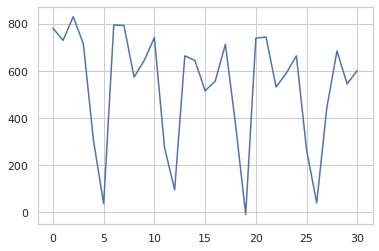

In [ ]:
plt.plot(infectionNo)


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/kumersanresearch/us.csv')
#df=df[df['date']>='2021-04-01']

df=df[df['date']>='2021-06-01']
df=df[df['date']<='2021-07-01']


In [ ]:
infect=np.array(df.cases)
for i in range(len(infect)-1,0,-1):
  infect[i]=infect[i]-infect[i-1]

infect=infect[1:]
  
  #day 1 removed to equal it to infect list
df=df[1:]  
df=df.reset_index()
df=df.drop('index',axis=1)
df.cases=np.array(infect)
						

In [ ]:
df

,date,cases,deaths
0,2021-06-02,16860,595435
1,2021-06-03,19505,596051
2,2021-06-04,-23994,596190
3,2021-06-05,10448,596565
4,2021-06-06,6147,596817
5,2021-06-07,19453,597153
6,2021-06-08,14178,597528
7,2021-06-09,20667,598100
8,2021-06-10,15807,598560
9,2021-06-11,16816,599077
